# Parkinson Disease Prediction using Machine Learning - Python

## 1. Importing Libraries and Dataset

In [2]:
pip install imblearn


   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset

In [4]:
df = pd.read_csv('parkinson_disease.csv')
pd.set_option('display.max_columns', 10)
df.sample(5)

,id,gender,PPE,DFA,RPDE,...,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
75,25,0,0.73737,0.78023,0.42484,...,3.4947,3.4119,4.2391,3.1501,1
635,211,0,0.80145,0.79355,0.46418,...,2.7616,3.2568,4.2019,3.2990,1
420,140,0,0.84870,0.82582,0.53232,...,3.1351,3.0960,3.1889,2.7137,1
399,133,0,0.84591,0.60866,0.59179,...,30.2428,44.5080,41.9666,79.8961,1
520,173,1,0.84033,0.60091,0.43949,...,1.9865,2.6381,3.8870,3.4914,0


## 3. Data Exploration and Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,125.500000,72.793721,0.000000,62.750000,125.500000,188.250000,251.00000
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


In [7]:
df.isnull().sum().sum()

np.int64(0)

## 4. Data Wrangling

In [16]:
print(df.columns.tolist())

['index', 'gender', 'ppe', 'dfa', 'rpde', 'numpulses', 'meanperiodpulses', 'stddevperiodpulses', 'locpctjitter', 'locshimmer', 'meanautocorrharmonicity', 'minintensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'gq_prc5_95', 'gq_std_cycle_open', 'gne_mean', 'gne_snr_tkeo', 'gne_snr_seo', 'gne_nsr_seo', 'vfer_mean', 'vfer_std', 'vfer_snr_tkeo', 'vfer_snr_seo', 'vfer_nsr_tkeo', 'imf_snr_seo', 'imf_snr_tkeo', 'imf_nsr_seo', 'imf_nsr_tkeo', 'mean_log_energy', 'mean_mfcc_0th_coef', 'mean_mfcc_1st_coef', 'mean_mfcc_2nd_coef', 'mean_mfcc_3rd_coef', 'mean_mfcc_4th_coef', 'mean_mfcc_5th_coef', 'mean_mfcc_6th_coef', 'mean_mfcc_7th_coef', 'mean_mfcc_8th_coef', 'mean_mfcc_9th_coef', 'mean_mfcc_10th_coef', 'mean_mfcc_11th_coef', 'mean_mfcc_12th_coef', 'mean_delta_log_energy', 'mean_1st_delta', 'mean_2nd_delta', 'mean_3rd_delta', 'mean_4th_delta', 'mean_5th_delta', 'mean_6th_delta', 'mean_7th_delta', 'mean_8th_delta', 'mean_9th_delta', 'mean_10th_delta', 'mean_11th_delta', 'mean_12th_delta', 

In [31]:
df.head()

,tqwt_kurtosisvalue_dec_34,tqwt_kurtosisvalue_dec_30,tqwt_kurtosisvalue_dec_28,tqwt_kurtosisvalue_dec_26,tqwt_kurtosisvalue_dec_25,...,dfa,ppe,gender,index,class
0,4.021533,12.293333,1.561733,1.591700,2.437633,...,0.696370,0.823387,1.0,0,1.0
1,5.490533,6.117633,4.918567,1.881900,1.831233,...,0.793993,0.415637,0.0,1,1.0
2,9.176633,14.584467,41.129400,1.590333,1.577067,...,0.619967,0.801973,1.0,2,1.0
3,3.184433,2.842167,1.677633,5.676767,4.138300,...,0.626097,0.828707,0.0,3,1.0
4,7.268333,2.953200,4.104600,3.614567,3.384267,...,0.779397,0.831287,0.0,4,1.0


In [20]:
columns = list(df.columns)
for col in columns:
    if col == 'class':
        continue

    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'class')):
            continue

        val = df[col].corr(df[col1])
        if val > 0.7:
            # If the correlation between the two features is more than 0.7, remove it
            columns.remove(col1)
            continue
        else:
            filtered_columns.append(col1)
            
    df = df[filtered_columns]
df.shape

(252, 288)

## 5. Feature Selection

In [32]:
X = df.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, df['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = df['class']
df = filtered_data
df.shape

(252, 31)

## 6. Handling Class Imbalance and Splitting Data

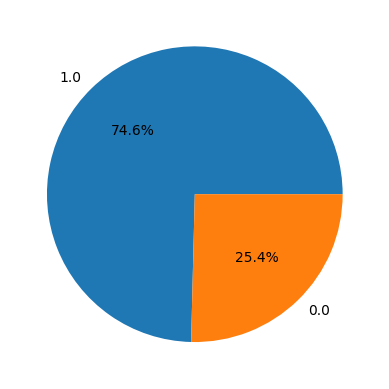

In [33]:
x = df['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

In [36]:
features = df.drop('class', axis=1)
target = df['class']

X_train, X_val,Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=10)

ros = RandomOverSampler(sampling_strategy=1.0,
                        random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.value_counts()

((302, 30),
 class
 1.0    151
 0.0    151
 Name: count, dtype: int64)

## 7. Model Training and Evaluation

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

models = [
    LogisticRegression(class_weight='balanced', max_iter=1000),
    XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    SVC(kernel='rbf', probability=True)
]

for model in models:
    model.fit(X_resampled, y_resampled)
    print(f'{model.__class__.__name__} :')

    # Training ROC-AUC
    train_probs = model.predict_proba(X_resampled)[:, 1]
    train_auc = roc_auc_score(y_resampled, train_probs)
    print('Training ROC-AUC :', train_auc)

    # Validation ROC-AUC
    val_probs = model.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, val_probs)
    print('Validation ROC-AUC :', val_auc)
    print()


LogisticRegression :
Training ROC-AUC : 0.8685199098422238
Validation ROC-AUC : 0.7946236559139785

XGBClassifier :
Training ROC-AUC : 1.0
Validation ROC-AUC : 0.9860215053763441

SVC :
Training ROC-AUC : 0.7213305102110512
Validation ROC-AUC : 0.6419354838709677



## 8. Analyzing Model Performance

In [55]:
print(X_val.shape)
print(y_val.shape)

(61, 30)
(61,)


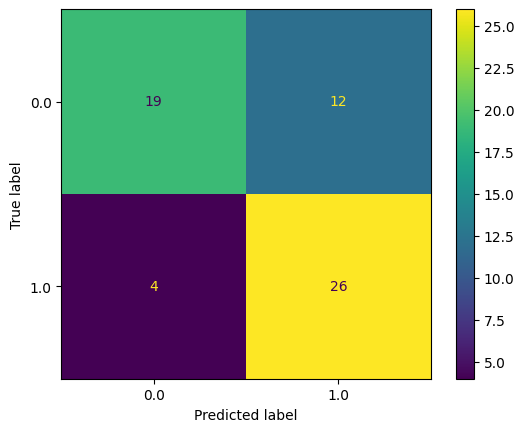

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    models[0],
    X_val,
    y_val
)

plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_val, models[0].predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.83      0.61      0.70        31
         1.0       0.68      0.87      0.76        30

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.76      0.74      0.73        61



In [60]:
import numpy as np
from sklearn.metrics import accuracy_score

probs = model.predict_proba(X_val)[:, 1]
thresholds = np.arange(0.3, 0.8, 0.05)

for t in thresholds:
    preds = (probs >= t).astype(int)
    acc = accuracy_score(y_val, preds)
    print(f"Threshold {t:.2f} → Accuracy {acc:.3f}")


Threshold 0.30 → Accuracy 0.623
Threshold 0.35 → Accuracy 0.607
Threshold 0.40 → Accuracy 0.574
Threshold 0.45 → Accuracy 0.574
Threshold 0.50 → Accuracy 0.607
Threshold 0.55 → Accuracy 0.590
Threshold 0.60 → Accuracy 0.623
Threshold 0.65 → Accuracy 0.541
Threshold 0.70 → Accuracy 0.508
Threshold 0.75 → Accuracy 0.508


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid,
    scoring='accuracy',
    cv=5
)

grid.fit(X_resampled, y_resampled)
best_model = grid.best_estimator_


In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_resampled, y_resampled)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model,
    X_resampled,
    y_resampled,
    scoring='accuracy',
    cv=5
)

print(scores.mean())


0.6649659863945578


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)


In [67]:
import numpy as np
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_val_scaled)[:, 1]
for t in np.arange(0.3, 0.8, 0.05):
    preds = (probs >= t).astype(int)
    print(t, roc_auc_score(y_val, probs))


0.3 0.6225806451612903
0.35 0.6225806451612903
0.39999999999999997 0.6225806451612903
0.44999999999999996 0.6225806451612903
0.49999999999999994 0.6225806451612903
0.5499999999999999 0.6225806451612903
0.5999999999999999 0.6225806451612903
0.6499999999999999 0.6225806451612903
0.7 0.6225806451612903
0.7499999999999999 0.6225806451612903


In [68]:
XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model,
    X_resampled,
    y_resampled,
    scoring='accuracy',
    cv=5
)

print(scores.mean())


0.6649659863945578


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_val, models[0].predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.83      0.61      0.70        31
         1.0       0.68      0.87      0.76        30

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.76      0.74      0.73        61



## The End !!